# Lab 02: CSS 120

In this self-paced lab, you'll get hands-on practice with the following **concepts**:

- Load data
- Add data to `XArray`
- Perform exploratory data analysis

### Note on hidden tests

Some of the questions in this lab will have **hidden tests**. This means that in addition to the `assert` statements you see in the code, there are *hidden* tests. The point is to check whether your code **generalizes** to other cases.

The lab will notify you when/where there is a hidden test, even if you can't see it.

### Motivation

In this Lab, we will learn how to use XArray to perform simple operations. As you know, XArray provides an efficiency way to study climate data. We will study here the global land temperatures in cities around the world.

In [1]:
# Importing packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Question 01

Load `Xarray` using its common alias (`xr`).

In [2]:
### BEGIN SOLUTION
import xarray as xr
### END SOLUTION

In [3]:
assert xr

## Question 02

The dataset we will use is in the folder of this lab. It is called `land_temp_city.csv`, and it holds the temperature in worldwide cities. Load it on pandas, saving it as `dat`.

In [4]:
### BEGIN SOLUTION
dat = pd.read_csv("land_temp_city.csv")
### END SOLUTION

In [5]:
assert dat.shape[0] == 8599212 and type(dat) == pd.DataFrame

## Question 03

To read correctly, you need to parse a few variables differently.

Here are the variables:

1. Variable `dt` as `date`. Save it as `dt`.
2. Variable `Latitude` as `float`. Save it as `y`.
3. Variable `Longitude` as `float`. Save it as `x`.

For example, run the first line below to check the data about San Diego. They started collecting the average temperatures in January 1st, 1849. Moreover, the latitude is 32.95N and the longitude 117.77W.

In [6]:
dat.loc[dat.City == "San Diego"].head(2)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
6631274,1849-01-01,13.116,2.586,San Diego,United States,32.95N,117.77W
6631275,1849-02-01,12.656,1.882,San Diego,United States,32.95N,117.77W


On the other hand, they started collected data about Sydney, Australia, a few earlier. Sydney's latitude is 34.56S and its longitude 151.78E.

In [7]:
dat.loc[dat.City == "Sydney"].head(2)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
7294154,1841-01-01,19.315,3.416,Sydney,Australia,34.56S,151.78E
7294155,1841-02-01,20.197,2.377,Sydney,Australia,34.56S,151.78E


I want you to:

1. Transform the dates into datetime objects:
    + *Hint*: check the most voted answer in StackOverflow in [this URL](https://stackoverflow.com/questions/28133018/convert-pandas-series-to-datetime-in-a-dataframe).
2. Transform the latitudes so that:
    + 32.95N becomes 32.95
    + 34.56S becomes -34.56
    + Save as `y`, since this is not the most adequate way to do this transformation (we will see later how to do it properly)
    + *Hint*: Multiply by minus when `S` and keep the same sign when `N`.
2. Transform the longitudes so that:
    + 117.77W becomes -117.77
    + 151.78E becomes 151.78
    + Save as `x`, since this is not the most adequate way to do this transformation (we will see later how to do it properly)
    + *Hint*: Multiply by minus when `W` and keep the same sign when `E`.
    
A hint for for (2) and (3) is to check out these functions:

In [8]:
extract_last_letter = lambda x: x[-1]
extract_last_letter("117.77W"), extract_last_letter("32.95N")

('W', 'N')

In [9]:
all_but_last_letter = lambda x: float(x[0:-1])
all_but_last_letter("117.77W"), all_but_last_letter("32.95N")

(117.77, 32.95)

In [10]:
### BEGIN SOLUTION
dat.dt = pd.to_datetime(dat.dt)
dat["y"] = dat.Latitude.apply(lambda x: np.where(extract_last_letter(x) == 'S', -1, 1) * all_but_last_letter(x))
dat["x"] = dat.Longitude.apply(lambda x: np.where(extract_last_letter(x) == 'W', -1, 1) * all_but_last_letter(x))
### END SOLUTION

In [11]:
assert dat.dt.sample(n = 1).dtype == '<M8[ns]'

In [12]:
assert dat.x.sample(n = 1).dtype.kind == dat.y.sample(n = 1).dtype.kind

In [13]:
assert dat.y.mean() == 25.675397306171796 and dat.loc[dat.Country == "Brazil"].x.mean() == -45.956917511249415

## Question 04

Plot the San Diego temperature over time. Save the plot in the `sdplot` object.

Step by step suggestion:

1. Start with filtering the San Diego data. Save in a different object (I usually save something temporary with the word `aux`)
2. Keep only `AverageTemperature` and `dt`
3. Make `dt` as the index using the `.set_index` function (see [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html)).
3. Make the plot placing the index (`dt`) in the `x`-axis and the temperature in the `y`-axis (hint [here](https://www.geeksforgeeks.org/time-series-plot-or-line-plot-with-pandas/))

In [14]:
sd_plot = ...

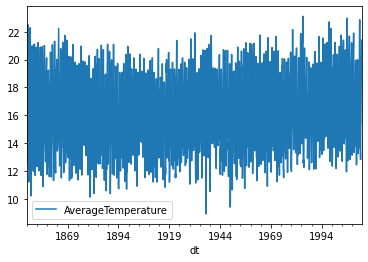

In [15]:
### BEGIN SOLUTION
aux = dat.loc[dat.City == "San Diego"][["dt", "AverageTemperature"]]
aux = aux.set_index("dt")
sd_plot = aux.plot()
### END SOLUTION

In [16]:
## This cell may contain a hidden test
assert sd_plot

## Question 05

Filter the dataset to keep only data starting from 1950-01-01 and on. Save as `dat2`.

- Hint 1: [Filter dates on pandas](https://stackoverflow.com/questions/22898824/filtering-pandas-dataframes-on-dates)

- Hint 2: In case you are curious why the date is in "YYYY-MM-DD" format, see [this](https://www.iso.org/iso-8601-date-and-time-format.html).

In [17]:
dat2 = ...

In [18]:
### BEGIN SOLUTION
dat2 = dat[dat.dt >= '1950-01-01']
### END SOLUTION

In [19]:
assert dat2.shape == (2685150, 9)

In [20]:
# Somewhat relevant for next steps...
dat2 = dat2.reset_index(drop = True)
dat2 = dat[dat.dt >= '1950-01-01']

## Question 06

Now we are going to import the data to `XArray`. First, keep only the variables:

```python
vars_to_keep = ['dt', 'x', 'y', 'AverageTemperature']
```

Second, we need to drop the duplicates:

```python
dat2[vars_to_keep].drop_duplicates()
```

Then, adapt this example:

```python
dat2 = dat2.set_index(['ind1', 'ind2', 'ind3'])
dat2.to_xarray()
```

Changing where needed. Here is the example function documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_xarray.html

In [21]:
ds = ...
vars_to_keep = ['dt', 'x', 'y', 'AverageTemperature', 'City', 'Country']

In [22]:
dat2 = dat[dat.dt >= '1950-01-01']
dat2 = dat2.dropna()
dat2[['City', 'Country']] = dat2[['City', 'Country']].astype('category')
dat2 = dat2.reset_index(drop = True)

In [ ]:
### BEGIN SOLUTION
dat2 = dat2[vars_to_keep].drop_duplicates()
dat2 = dat2.set_index(['dt', 'x', 'y'])
dat2 = dat2.groupby(level = dat2.index.names).nth(0)
ds = dat2.to_xarray()
### END SOLUTION

In [ ]:
ds.to_netcdf(path = 'city_temps.nc')

In [ ]:
assert np.isclose(ds.AverageTemperature.mean().to_numpy(), 17.52345202)

In [ ]:
ds.to_netcdf('avg_temps.nc')

## Question 07

Plot the same graph with San Diego. Just as a reminder, you need to select the:

- `x = -117.77`
- `y = 32.95`

It should be way easier than with base pandas.

Step-by-step:

1. Select the coordinates.
2. Use the plot function.

In [ ]:
ds_plot_2 = ...

In [ ]:
### BEGIN SOLUTION
ds_plot_2 = ds.AverageTemperature.sel(x = -117.77, y = 32.95).plot()
### END SOLUTION

In [ ]:
# This cell may have a hidden test
assert ds_plot_2

## Question 08

Compute the mean temperature accross all cities, and save it in the object `mean_temp`. Then, plot it.

Hint: Think hard about how to aggregate correctly.

In [ ]:
mean_temp = ...

In [ ]:
### BEGIN SOLUTION
mean_temp = ds.AverageTemperature.mean(dim = ['x', 'y'])
mean_temp.plot()
### END SOLUTION

In [ ]:
assert type(mean_temp) == xr.core.dataarray.DataArray

In [ ]:
assert mean_temp.to_numpy()[3] == 17.69738579795022

### Great work!